In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape


(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000,)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

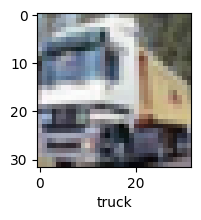

In [ ]:
plot_sample(X_train, y_train, 1)

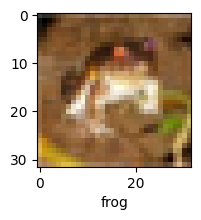

In [ ]:
plot_sample(X_train, y_train, 0)

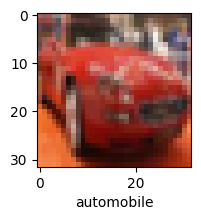

In [ ]:
plot_sample(X_train, y_train, 5)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
 layers.Flatten(input_shape=(32,32,3)),
 layers.Dense(3000, activation='relu'),
 layers.Dense(1000, activation='relu'),
 layers.Dense(10, activation='softmax')
 ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.compile(optimizer='SGD',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5121 - loss: 1.3898
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5276 - loss: 1.3562
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5379 - loss: 1.3140
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5515 - loss: 1.2828
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5636 - loss: 1.2469
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5720 - loss: 1.2227
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5817 - loss: 1.1907
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5941 - loss: 1.1636
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6043 - loss: 1.1341
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6115 - loss: 1.1129
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6245 - loss: 1.0799
Epoch 12/15
1563/1563 ━━━━

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.66      0.61      1000
           1       0.54      0.77      0.64      1000
           2       0.45      0.42      0.44      1000
           3       0.48      0.21      0.29      1000
           4       0.38      0.65      0.48      1000
           5       0.52      0.39      0.44      1000
           6       0.51      0.69      0.58      1000
           7       0.72      0.52      0.60      1000
           8       0.66      0.70      0.68      1000
           9       0.74      0.35      0.47      1000

    accuracy                           0.53     10000
   macro avg       0.56      0.53      0.52     10000
weighted avg       0.56      0.53      0.52     10000



In [ ]:
cnn = models.Sequential([
 layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
input_shape=(32, 32, 3)),
 layers.MaxPooling2D((2, 2)),

 layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),

 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3836 - loss: 1.6994
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5991 - loss: 1.1417
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6529 - loss: 0.9984
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6849 - loss: 0.9057
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7133 - loss: 0.8312
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7336 - loss: 0.7711
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7470 - loss: 0.7301
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7603 - loss: 0.6881
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7759 - loss: 0.6429
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7845 - loss: 0.6189


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7059 - loss: 0.8935
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'airplane'

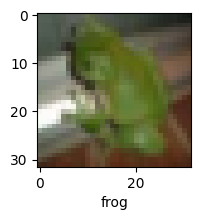

In [ ]:
cnn.evaluate(X_test,y_test)
y_pred = cnn.predict(X_test)
y_pred[:5]
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]
y_test[:5]
plot_sample(X_test, y_test,7)
classes[y_classes[3]]